In [0]:
import torch
from sklearn.datasets import fetch_california_housing

In [0]:
data = fetch_california_housing()

In [0]:
data.data
#Numpy array로 존재 해 있다.

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [0]:
data.data.shape
#feature 가 8개인 data

(20640, 8)

In [0]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [0]:
data.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

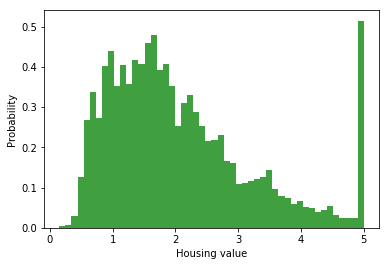

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
n, bins, patches = plt.hist(data.target, 50, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Housing value')
plt.ylabel('Probability')
#plt.grid(True)
plt.show()

In [0]:
#정규분포를 따르지 않지만 out라이어 처럼 오른쪽 값이 확 올라와있음
#그래서 정규분포로하면 오히려 성능이 저하되지 않을까 해서 
#minmax로 하였음
#이미지화(시각화)시킴으로써 어떤 정규화를 사용했을때 좋은 결과가 나오는지 유추할 수 있다.

In [0]:
target = data.target

In [0]:
from sklearn.model_selection import train_test_split
# testset을 만들기 위해서 random하게 split 하기

In [0]:
#input을 받아서 split하는 함수 (ex. x를 x_train, x_test)
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2)
# test랑 train의 데이터 비율을 나눌 때의 값 text_size

In [0]:
X_train.shape
# 아까 20640개 에서 16512로 줄어든 것을 알 수 있다.
# 즉 train set이 16512, 차가 test set이 됨

(16512, 8)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2)

In [0]:
min_, max_ = y_train.min(), y_train.max()
y_train = (y_train - min_)/(max_-min_)
# 무조건 0~1사이의 값으로 바꾸어 준다.

In [0]:
# sklearn 에서 class은 Pattern이 fit을 하고 transform하는 형태이다.
# 그 객체네는 평균과 분산이 속성으로 들어가 있다.
from sklearn.preprocessing import StandardScaler

In [0]:
std_scaler = StandardScaler()

In [0]:
# 방법1
X_train = std_scaler.fit_transform(X_train)
X_text = std_scaler.transform(X_test)
#training data set을 이용하는 것임으로 fit가 아니다.

In [0]:
#방법2
std_scaler.fit(X_train)
X_train = std_scaler.transform(X_train)

#평균을 빼고 표준편차를 구해준다. -> 정규분포를 구함. (정규화)
# X_train의 값을 정규화 해서 다시 X_train에 넣음

In [0]:
std_scaler.var_
# feature가 8개 임으로 8개의 값을 보인다.

array([3.63677753e+00, 1.58320363e+02, 6.28741621e+00, 2.37004380e-01,
       1.23260019e+06, 1.19518281e+02, 4.55271149e+00, 4.00840084e+00])

In [0]:
# 파이토치에서 사용할 수 있도록 DATASET을 만든다.
#tensordataset : tensor들을 여러개 받아서 datset을 만든다.

In [0]:
X_train
#Numpy array임으로 이것을 tensor로 바꾸어주어야한다.

array([[ 0.45777205,  0.66678881, -0.11094855, ...,  0.05989871,
        -0.81368326,  0.73705799],
       [-0.65967019,  1.22311519, -0.84836844, ..., -0.02887541,
         1.00943373, -1.31079267],
       [-0.19769618, -1.4790415 ,  0.19991028, ..., -0.03110762,
        -0.04038171, -0.56157902],
       ...,
       [-0.06387579,  1.30259039, -0.09983093, ...,  0.01255073,
         0.98600035, -1.46063541],
       [ 0.1159847 , -1.3995663 ,  0.14403719, ...,  0.01003022,
        -0.86055002,  1.1266491 ],
       [-1.14702392, -0.60481433, -0.75826274, ..., -0.00625122,
        -1.352651  ,  1.23153901]])

In [0]:
X_train, y_train = torch.from_numpy(X_train), torch.from_numpy(y_train)
X_test, y_test = torch.from_numpy(X_test), torch.from_numpy(y_test)

X_train, y_train = X_train.float(), y_train.float()
X_test, y_test =X_test.float(), y_test.float()

y_train, y_test =y_train.view(-1, 1), y_test.view(-1,1)
#각각의 numpy array를 tensor로 만들어 주었다.

In [0]:
from torch.utils.data import TensorDataset, DataLoader

In [0]:
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

In [0]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=12)

In [0]:
for batch_X, batch_y in train_loader:
    print(batch_X)
    print(batch_y)
    break
    #각 배치별로 x와 y를 받아 올 수 있다.

tensor([[ 0.9914, -1.0022,  0.3865, -0.1184, -0.1639,  0.0146, -0.6918,  0.2975],
        [ 0.0744,  1.1436, -0.1564,  0.0312, -0.1990, -0.0562, -0.7715,  0.5722],
        [-0.1895,  0.8257,  0.2097, -0.1980, -1.0313, -0.0815,  0.9766, -1.2808],
        [-0.8532, -0.9227, -0.6255, -0.0856,  0.1370, -0.0076, -1.4323,  1.2365],
        [-0.4435,  1.1436, -0.3225, -0.0842,  0.1126,  0.0949, -0.7809,  0.6821],
        [ 1.8998,  1.7000,  0.2786, -0.2237, -0.3620, -0.0842,  1.0329, -1.3208],
        [-0.8663,  0.9847, -0.1080, -0.0899, -1.2294,  0.0463,  0.9391, -1.4207],
        [-0.6912, -0.6843, -1.1420, -0.1087, -1.2285, -0.0067, -0.8699,  0.6721],
        [ 0.7363,  0.5873,  0.3145, -0.0208, -0.5449, -0.0391,  0.9673, -1.4556],
        [ 0.0705,  1.8589,  0.4452, -0.2425, -0.7169, -0.0708,  1.0141, -1.3058],
        [-0.7117,  0.5078, -0.7817, -0.2685,  0.1757,  0.0197, -0.6731,  0.5672],
        [-0.7002,  0.9847, -0.7162, -0.2575, -0.8565, -0.0681, -0.7621,  0.5523],
        [-0.8823

In [0]:
import torch.nn as nn

In [0]:
# 모델 정의
#괄호에는 상속으로 nn.Module이 들어가야한다.
class Model(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(Model, self).__init__()
        self.input_dim=input_dim
        self.hidden_dim = hidden_dim
        
        self.linear1 = nn.Linear(self.input_dim, self.hidden_dim)
       
        #이것만 있으면 선형회기랑 같다.
        self.linear2 = nn.Linear(self.hidden_dim , 1) # 예측 할 것이 집값 1개라서 그냥 1 
        
        
    
    def forward(self,x):
        z1 = self.linear1(x)
        a1 = torch.relu(z1)
        #relu 함수 사용
        z2 = self.linear2(a1)
        a2 = torch.sigmoid(z2)
        #시그모이드 함수 사용
        return a2
    
# training set 중 일부를 벨리데이션 set으로 만들어서 벨리데이션 set이 어느 순간부터 증가하면 에폭을 멈추는 것
# overfitting 을 방지하기 위해서
# batch size도 모델에 영향을 미치지만 간단한 모델에서는 크게 영향을 끼치지 않는다.
# 만약 모델 사이즈가 너무 크다면 gpu사이즈가 힘 닿을만큼 사이즈를 한다.

# torch.optim.lrshceduler : 사람이 정한 이터레이션 마다 런닝 메이트를 조금씩 줄여나가는 것
# 런닝메이트(얼마빠르게하는가)를 크게 키워서 모델을 빠르게 학습시키고 점점 모델을 미세 공정한다. 

# w1,w2 .. 등의 값을 너무 크지 않게 제약을 두는 것 : weighting-k
# 아담 등의 옵티마이저를 정의 할때 같이 정의할 수 있다.
# ooptimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight = ..? )
# weight를 너무 크게 주면 안된다 ! 

In [0]:
# 선형회기 방식

#괄호에는 상속으로 nn.Module이 들어가야한다.
class Model(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(Model, self).__init__()
        self.input_dim=input_dim
        self.hidden_dim = hidden_dim
        
        
        #이것만 있으면 선형회기랑 같다.
        self.linear = nn.Linear(self.hidden_dim , 1) # 예측 할 것이 집값 1개라서 그냥 1 
        
        
    
    def forward(self,x):
        z1 = self.linear1(x)
        a1 = torch.relu(z1)
        #relu 함수 사용
        z2 = self.linear2(a1)
        a2 = torch.sigmoid(z2)
        #시그모이드 함수 사용
        return a2

In [0]:
device =torch.device('cuda')
model =Model(8,32)
# hidden_dim 32 
# input은 feature 갯수 8

#gpu메모리에 복사
model = model.to(device)

mse_loss = nn.MSELoss()

# 아담이라는 optimzizer 사용 첫번쨰 인자에는 파라메타, 두번째 인자에는 learning mate? 를 넣는다.
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [0]:
epochs = 10

model.train()

#batch x와 y사 cpu 메모리에 있음으로 gpu메모리에 복사해준다.

for e in range(epochs):
    for i, (batch_X, batch_y) in enumerate(train_loader):
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        
        predict = model(batch_X)
        # batch size 32임으로 32이일때 예측값이 predict에 저장된다.
        loss = mse_loss(predict, batch_y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if i % 200 == 0:
            loss = loss.item()
            
            print(f"{e}, {i} - {loss}")

0, 0 - 0.09558461606502533
0, 200 - 0.019482308998703957
0, 400 - 0.024251705035567284
1, 0 - 0.016049928963184357
1, 200 - 0.028279073536396027
1, 400 - 0.008484017103910446
2, 0 - 0.025231709703803062
2, 200 - 0.017426978796720505
2, 400 - 0.010670489631593227
3, 0 - 0.040613025426864624
3, 200 - 0.01168146077543497
3, 400 - 0.01779141277074814
4, 0 - 0.013133348897099495
4, 200 - 0.008591432124376297
4, 400 - 0.023607507348060608
5, 0 - 0.02564321830868721
5, 200 - 0.01269567757844925
5, 400 - 0.015616598539054394
6, 0 - 0.0098111592233181
6, 200 - 0.007288173772394657
6, 400 - 0.0295658428221941
7, 0 - 0.029280448332428932
7, 200 - 0.006918889004737139
7, 400 - 0.01703045889735222
8, 0 - 0.009311925619840622
8, 200 - 0.015845168381929398
8, 400 - 0.009519509971141815
9, 0 - 0.01441115327179432
9, 200 - 0.01182837039232254
9, 400 - 0.007242802530527115


In [0]:
#batch size를 32라고 정의했기 때문에
for batch_X, batch_y in train_loader:
    print(batch_X.shape)
    print(batch_y.shape)
    break

torch.Size([32, 8])
torch.Size([32, 1])


In [0]:
# 절대 값 한 것을 loss로 사용한다.
#실제 예측값과 타깃값의 절대적인 차이를 구한다.
l1_loss = nn.L1Loss()

In [0]:
# sample들의 loss의 총합을 구한다.
# test dataset의 총갯수로 나누면 testdataset에 대한 전체적인 평균 값이 된다.

#테스트 데이터 갯수 구하기
test_num=0
total_loss = []

#테스트할떄 경사하강률을 구할 필요는 없음
with torch.no_grad():
    model.eval()
    
    for batch_X, batch_y in test_loader:
        #gpu 메모리에 복사한다.
        batch_X, batch_y = batch_X.to(device) , batch_y.to(device)
        
        # training data set에 대해서 정규화 했기때문에 testset에 대해서도 정규화를 해줘야한다.
  #      batch_X = (batch_X - std_scaler.mean_)/std_scaler.var_
        predict = model(batch_X)
        
        
        # predict 역변환
        predict = (max_ - min_)*predict + min_
        loss = l1_loss(predict, batch_y)
        
        #이 loss를 item으로 해서 cpu메모리에 옮겨준다.
        loss = loss.item()
        #이터레이션에 따른 평균
        batch_size = batch_X.size(0)
        #이터레이션 마다 shape이 다름
        
        total_loss.append(loss*batch_size)
        test_num += batch_size
        

total_loss = np.sum(total_loss)/test_num
print(total_loss)
# testset, datasest 갯수가 8*98일때 32씩 나눴을때 2개가 남음. 결국 남은 2에대한 평균을 구하면 맞지않음으로
# 갯수에 따른 가중치를 곱해줘야한다.


2.9524874004513717


In [0]:
# batch 32개의 데이터를 뽑아옴 32* 8
# 32*8의 첫번째 값을 input으로 넣고
#hidden demension을 32라고 했는데
#batch_size와 hidden demension은 아줒 별개이다.
#input demension과 feature의 갯수는 같아야함 -> 아니면 error 발생.

In [0]:
model.linear1.weight

Parameter containing:
tensor([[-5.5243e-01, -4.3385e-01, -8.7458e-02,  2.7469e-01,  2.1158e-01,
         -4.2903e-01, -1.5136e-01, -4.0116e-02],
        [-1.6145e-01,  4.4096e-02,  1.4923e-01,  2.0162e-01, -2.1385e-03,
          8.6848e-01,  3.3221e-01,  4.3321e-01],
        [-1.3742e-02, -2.2131e-01,  1.0006e-02, -5.9139e-02,  1.3391e-01,
          6.1100e-01, -6.9306e-02,  3.8332e-01],
        [-1.6547e-01,  1.5930e-01,  1.0203e-01,  3.1954e-01,  1.4307e-01,
         -1.8512e-01, -2.1390e-01,  3.2976e-01],
        [-1.0420e-01, -6.5496e-03,  1.7713e-01, -1.7478e-01, -2.1677e-01,
          5.0664e-01,  2.6011e-01,  3.8871e-01],
        [-1.2301e-01,  3.1846e-01,  8.3581e-02,  3.7379e-01,  1.5673e-01,
          5.9383e-01,  1.5557e-01,  1.6203e-02],
        [-6.0477e-02,  7.2697e-02,  1.8711e-01, -7.2866e-02,  4.7935e-02,
          3.5479e-01, -1.2179e-01,  1.6296e-01],
        [ 1.3014e-01, -2.8421e-01,  9.5614e-02,  3.4909e-01, -3.1022e-01,
         -1.6571e+00, -1.1292e-01, -6.9635e